### lawtimes 신문사 crawling
### crawling한 text로 wordcloud 생성
### 그 후의 해석?

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time

# crawling practice

In [3]:
url = 'https://www.lawtimes.co.kr/Legal-News/Legal-News-View?serial=159898&kind=AA&key='
res = requests.get(url)
res.encoding = 'utf-8'
soup = BeautifulSoup(res.text, 'html')

article = soup.find_all('article')
article_list = []

for i in article:
    article_list.append(i.text)

article_text = article_list[0]
article_text = re.sub('\s\s+', ' ', re.sub('\n|\t|\r', '', article_text))

#article_text.replace('\xa0','')

In [4]:
url = 'https://www.lawtimes.co.kr/Legal-News/Legal-News-View?serial=159872'
res = requests.get(url)
res.encoding = 'utf-8'
soup = BeautifulSoup(res.text, 'html')

#article의 emblem, title, subtitle, text
article_time = soup.find_all('time')[0].text.strip()[:10]
article_em = soup.find_all('em')[0].text.strip()
article_title = soup.find_all('h2')[0].text.strip().replace('"', '')
article_subtitle = soup.find_all('h3')[0].text.strip()
article_subtitle = re.sub('\n|\t|\r', '', article_subtitle)
article_text = soup.find_all('article')[0].text.strip().replace('\xa0', '')
article_text = re.sub('\s\s+', ' ', re.sub('\n|\t|\r', '', article_text))

article_list = []

article_list = [article_time, article_em, article_title, article_subtitle, article_text]

In [5]:
article_text

'대검찰청은 27일 전국 일선 검찰청에 \'코로나19 관련 사건 엄단 지시 및 사건처리기준 등 전파\' 공문을 보내 코로나19와 관련한 행정기관의 역학조사를 방해하는 행위 등에 대해 엄정 대응할 것을 지시했다.대검이 엄정 대처를 주문한 사건은 △행정기관의 역학조사 거부 또는 방해 등 방역당국에 대한 의도적·조직적 비협조 행위 △마스크 유통교란 사범 및 사기 등 보건용품 관련 범행 △허위사실 유포 △환자 정보 유출 등이다.또 대검 형사부는 전국 사건 처리의 통일성과 형평성을 위해 \'코로나19 관련 사건처리 기준\', \'코로나19 관련 법률 적용표\' 등을 일선 청에 전달됐다.이에 따르면 우선 조직적이고 계획적인 역학조사 거부 행위나 정부 방역정책에 대한 적극적인 방해가 있을 경우에는 구속수사한다. 역학조사를 거부·방해·회피하거나 거짓 진술 또는 거짓 자료제출, 고의적 사실 은폐 누락 등의 행위를 한 때에는 원칙적으로 정식재판에 넘긴다.역학조사를 하는 공무원에 대한 위계공무집행방해나 허위사실 유포, 정보 유출 행위에 대해서도 죄질이 불량한 경우 구속수사할 방침이다. 이외에도 마스크 사재기 등 보건용품 유통 교란 사범에 대해서는 현 상황의 엄중함을 고려해 기존 사건처리 기준보다 가중해 처리하기로 했다.대검 관계자는 "오늘 지시는 특히 행정당국에서 실시하고 있는 방역 조치의 실효성을 확보하고, 마스크 구입 애로 등 국민들의 불안을 해소하기 위한 취지"라고 설명했다.'

In [6]:
article_list

['2020-02-27',
 '법무부, 검찰',
 '조직적 역학조사 방해, 구속수사 등 엄정 대응',
 '대검찰청, 전국 일선 검찰청에 지시',
 '대검찰청은 27일 전국 일선 검찰청에 \'코로나19 관련 사건 엄단 지시 및 사건처리기준 등 전파\' 공문을 보내 코로나19와 관련한 행정기관의 역학조사를 방해하는 행위 등에 대해 엄정 대응할 것을 지시했다.대검이 엄정 대처를 주문한 사건은 △행정기관의 역학조사 거부 또는 방해 등 방역당국에 대한 의도적·조직적 비협조 행위 △마스크 유통교란 사범 및 사기 등 보건용품 관련 범행 △허위사실 유포 △환자 정보 유출 등이다.또 대검 형사부는 전국 사건 처리의 통일성과 형평성을 위해 \'코로나19 관련 사건처리 기준\', \'코로나19 관련 법률 적용표\' 등을 일선 청에 전달됐다.이에 따르면 우선 조직적이고 계획적인 역학조사 거부 행위나 정부 방역정책에 대한 적극적인 방해가 있을 경우에는 구속수사한다. 역학조사를 거부·방해·회피하거나 거짓 진술 또는 거짓 자료제출, 고의적 사실 은폐 누락 등의 행위를 한 때에는 원칙적으로 정식재판에 넘긴다.역학조사를 하는 공무원에 대한 위계공무집행방해나 허위사실 유포, 정보 유출 행위에 대해서도 죄질이 불량한 경우 구속수사할 방침이다. 이외에도 마스크 사재기 등 보건용품 유통 교란 사범에 대해서는 현 상황의 엄중함을 고려해 기존 사건처리 기준보다 가중해 처리하기로 했다.대검 관계자는 "오늘 지시는 특히 행정당국에서 실시하고 있는 방역 조치의 실효성을 확보하고, 마스크 구입 애로 등 국민들의 불안을 해소하기 위한 취지"라고 설명했다.']

# crawling code

In [ ]:
https://www.lawtimes.co.kr/Legal-News/Legal-News-View?serial=159898&kind=AA&key=
https://www.lawtimes.co.kr/Legal-News/Legal-News-View?serial=159881&kind=AA&key=
https://www.lawtimes.co.kr/Legal-News/Legal-News-View?serial=159853&kind=AA&key=
    
https://www.lawtimes.co.kr/Legal-News/Legal-News-View?serial=159870&kind=AN01&key=
https://www.lawtimes.co.kr/Legal-News/Legal-News-View?serial=159811&kind=AN01&key=
    
https://www.lawtimes.co.kr/Legal-News/Legal-News-View?serial=159872&kind=AD&key=

#뒤에 kind랑 key는 없어도 똑같은듯
#serial number를 어떻게 수집?

### serial number의 기준은 잘 모르겠음. 아마 올린 순서대로 넘버가 붙고, emblem과는 무관하게 붙는 것 같은데 그러면 쭉 159000~159898 한다음에 비어서 에러나는 애들만 try-except로 제외하는게 더 쉬울듯

In [7]:
def lawtimes_crawling(serial_num):
    url = 'https://www.lawtimes.co.kr/Legal-News/Legal-News-View?serial=' + str(serial_num)
    
    res = requests.get(url)
    res.encoding = 'utf-8'
    soup = BeautifulSoup(res.text, 'html')

    article_date = soup.find_all('time')[0].text.strip()[:10]
    article_em = soup.find_all('em')[0].text.strip()
    article_title = soup.find_all('h2')[0].text.strip().replace('"', '')
    article_subtitle = soup.find_all('h3')[0].text.strip()
    article_subtitle = re.sub('\n|\t|\r', '', article_subtitle)
    article_text = soup.find_all('article')[0].text.strip().replace('\xa0', '')
    article_text = re.sub('\s\s+', ' ', re.sub('\n|\t|\r', '', article_text))
    
    article_list = [article_date, article_em, article_title, article_subtitle, article_text]

In [8]:
serial = list(range(159880, 159899))

In [9]:
article_total = []

for num in serial:
    try:
        lawtimes_crawling(num)
        article_total.append(article_list)
    except:
        print('no article in this serial:', num)

no article in this serial: 159891
no article in this serial: 159893
no article in this serial: 159897


In [10]:
df = pd.DataFrame(article_total, columns=['date', 'emblem', 'title', 'subtitle', 'text'])

In [165]:
df
#계속 같은것만 추가됨. class로 해결해보게씀

,date,emblem,title,subtitle,text
0,2020-02-27,"법무부, 검찰","조직적 역학조사 방해, 구속수사 등 엄정 대응","대검찰청, 전국 일선 검찰청에 지시",대검찰청은 27일 전국 일선 검찰청에 '코로나19 관련 사건 엄단 지시 및 사건처리...
1,2020-02-27,"법무부, 검찰","조직적 역학조사 방해, 구속수사 등 엄정 대응","대검찰청, 전국 일선 검찰청에 지시",대검찰청은 27일 전국 일선 검찰청에 '코로나19 관련 사건 엄단 지시 및 사건처리...
2,2020-02-27,"법무부, 검찰","조직적 역학조사 방해, 구속수사 등 엄정 대응","대검찰청, 전국 일선 검찰청에 지시",대검찰청은 27일 전국 일선 검찰청에 '코로나19 관련 사건 엄단 지시 및 사건처리...
3,2020-02-27,"법무부, 검찰","조직적 역학조사 방해, 구속수사 등 엄정 대응","대검찰청, 전국 일선 검찰청에 지시",대검찰청은 27일 전국 일선 검찰청에 '코로나19 관련 사건 엄단 지시 및 사건처리...
4,2020-02-27,"법무부, 검찰","조직적 역학조사 방해, 구속수사 등 엄정 대응","대검찰청, 전국 일선 검찰청에 지시",대검찰청은 27일 전국 일선 검찰청에 '코로나19 관련 사건 엄단 지시 및 사건처리...
5,2020-02-27,"법무부, 검찰","조직적 역학조사 방해, 구속수사 등 엄정 대응","대검찰청, 전국 일선 검찰청에 지시",대검찰청은 27일 전국 일선 검찰청에 '코로나19 관련 사건 엄단 지시 및 사건처리...
6,2020-02-27,"법무부, 검찰","조직적 역학조사 방해, 구속수사 등 엄정 대응","대검찰청, 전국 일선 검찰청에 지시",대검찰청은 27일 전국 일선 검찰청에 '코로나19 관련 사건 엄단 지시 및 사건처리...
7,2020-02-27,"법무부, 검찰","조직적 역학조사 방해, 구속수사 등 엄정 대응","대검찰청, 전국 일선 검찰청에 지시",대검찰청은 27일 전국 일선 검찰청에 '코로나19 관련 사건 엄단 지시 및 사건처리...


In [11]:
class lawtimes:
    def __init__(self, num):
        self.num = num
        
    def lawtimes_crawling(self):
        url = 'https://www.lawtimes.co.kr/Legal-News/Legal-News-View?serial=' + str(self.num)

        res = requests.get(url)
        res.encoding = 'utf-8'
        soup = BeautifulSoup(res.text, 'html')

        article_date = soup.find_all('time')[0].text.strip()[:10]
        article_em = soup.find_all('em')[0].text.strip()
        article_title = soup.find_all('h2')[0].text.strip().replace('"', '')
        article_subtitle = soup.find_all('h3')[0].text.strip()
        article_subtitle = re.sub('\n|\t|\r', '', article_subtitle)
        article_text = soup.find_all('article')[0].text.strip().replace('\xa0', '')
        article_text = re.sub('\s\s+', ' ', re.sub('\n|\t|\r', '', article_text))

        article_list = [article_date, article_em, article_title, article_subtitle, article_text]
        
        self.article_list = article_list

In [12]:
serial = list(range(159000, 159899))

t1 = time.time()

article_total = []

for num in serial:
    try:
        do = lawtimes(num)
        do.lawtimes_crawling()
        article_total.append(do.article_list)
    except:
        #print('no article in this serial:', num)
        pass

article_df = pd.DataFrame(article_total, columns=['date', 'emblem', 'title', 'subtitle', 'text'])
    
t2 = time.time()

print('time:', t2-t1)

time: 289.8380765914917


In [118]:
article_df = article_df.sort_values(by='date')
article_df.reset_index(inplace=True, drop=True)
article_df.to_csv('C:\\Users\\parks\\Desktop\\lawtimes.csv', index=False, encoding='utf-8')

In [ ]:
article_df = pd.read_csv('C:\\Users\\parks\\Desktop\\lawtimes.csv')

In [193]:
serial = list(range(158000, 159000))

t1 = time.time()

article_total = []

for num in serial:
    try:
        do = lawtimes(num)
        do.lawtimes_crawling()
        article_total.append(do.article_list)
    except:
        #print('no article in this serial:', num)
        pass

article_df = pd.DataFrame(article_total, columns=['date', 'emblem', 'title', 'subtitle', 'text'])
article_df = article_df.sort_values(by='date')
article_df.reset_index(inplace=True, drop=True)
article_df.to_csv('C:\\Users\\parks\\Desktop\\lawtimes2.csv', index=False, encoding='utf-8')
    
t2 = time.time()

print('time:', t2-t1)

time: 441.1086382865906


In [194]:
article_df2 = pd.read_csv('C:\\Users\\parks\\Desktop\\lawtimes2.csv', encoding='utf-8')

### 일단 월별로 묶어서 하나의 text로 쳤음. text_12 = 12월 기사들

emblem이랑 subtitle은 사용 못했음. 일단은 text만 가지고 wordcloud 생성

In [197]:
texts_12 = []

for i in range(len(article_df2)):
    if pd.to_datetime(article_df2['date'][i]) < pd.to_datetime('2020-01-01'):
        for j in article_df2['text'][i].split('.'):
            texts_12.append(j)

In [200]:
texts_1 = []

for i in range(len(article_df)):
    if pd.to_datetime(article_df['date'][i]) < pd.to_datetime('2020-02-01'):
        for j in article_df['text'][i].split('.'):
            texts_1.append(j)
            
for i in range(len(article_df2)):
    if (pd.to_datetime(article_df2['date'][i]) < pd.to_datetime('2020-02-01')) and (pd.to_datetime(article_df2['date'][i]) > pd.to_datetime('2019-12-31')):
        for j in article_df2['text'][i].split('.'):
            texts_1.append(j)

In [179]:
texts_2 = []

for i in range(len(article_df)):
    if (pd.to_datetime(article_df['date'][i]) < pd.to_datetime('2020-03-01')) and (pd.to_datetime(article_df['date'][i]) > pd.to_datetime('2020-01-31')):
        for j in article_df['text'][i].split('.'):
            texts_2.append(j)

In [182]:
texts_3 = []

for i in range(len(article_df)):
    if pd.to_datetime(article_df['date'][i]) > pd.to_datetime('2020-02-29'):
        for j in article_df['text'][i].split('.'):
            texts_3.append(j)

# word cloud & krwordrank

In [142]:
from krwordrank.word import KRWordRank
from nltk.tokenize import sent_tokenize
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import konlpy
font_path = 'C:/Windows/Fonts/malgun.ttf'
%matplotlib inline
import matplotlib.pyplot as plt

## wordcloud function

In [191]:
def to_wordcloud(text):
    wordrank_extractor = KRWordRank(min_count=5, max_length=10)
    beta, max_iter = 0.85, 10
    keywords, rank, graph = wordrank_extractor.extract(text, beta, max_iter)
    
    stopwords = {'은', '이다', '입니다', '였다', '한다', '했다', '있다', '대한', 
                 '있는', '경우', '관한', '것으로', '따라', '등을', '\\', '것이',
                '하는'}
    passwords = {word:score for word, score in sorted(
        keywords.items(), key=lambda x:-x[1])[:300] if not (word in stopwords)}

    wordcloud = WordCloud(stopwords=stopwords)
    #wordcloud = wordcloud.generate_from_text(text)
    
    wordcloud = WordCloud(
        font_path = font_path,
        width = 800,
        height = 800,
        background_color = 'white')
    

    wordcloud = wordcloud.generate_from_frequencies(passwords)
    
    return wordcloud
    

def show_wordcloud(wc):
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.show()

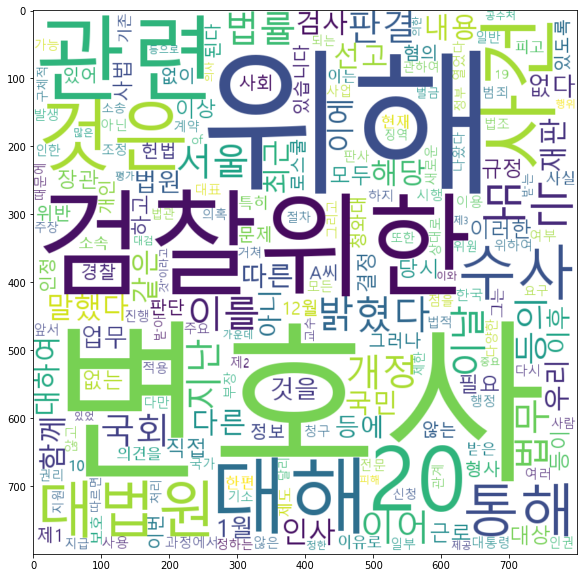

In [201]:
wc = to_wordcloud(texts_1)
show_wordcloud(wc)

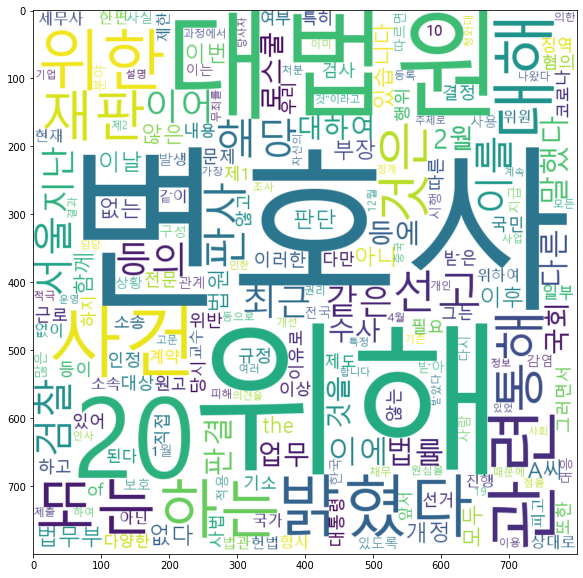

In [189]:
wc2 = to_wordcloud(texts_2)
show_wordcloud(wc2)

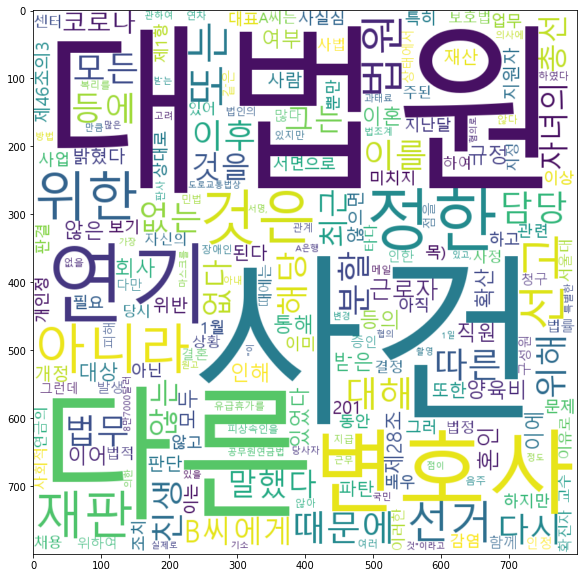

In [192]:
wc3 = to_wordcloud(texts_3)
show_wordcloud(wc3)

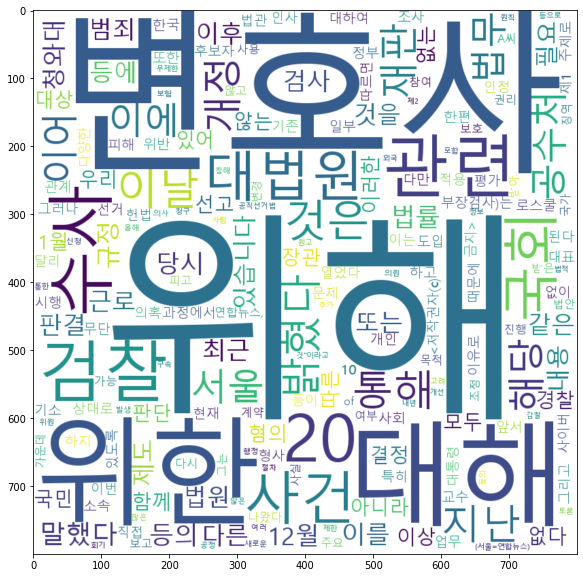

In [199]:
wc12 = to_wordcloud(texts_12)
show_wordcloud(wc12)

## wordcloud 연습

In [146]:
example = article_df.text[0]

In [147]:
texts = example.split('.')

In [148]:
wordrank_extractor = KRWordRank(
    min_count = 5, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 10, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)
for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:30]:
    print('%8s:\t%.4f' % (word, r))

scan vocabs ... 
num vocabs = 55
done = 10
      대한:	3.5943
     성전환:	2.4022
   전역심사위:	2.1082
      있다:	1.2156
    A부사관:	0.9783
     인권위:	0.9141
      복무:	0.6957


In [163]:
stopwords = {'은', '입니다', '이다'}
passwords = {word:score for word, score in sorted(
    keywords.items(), key=lambda x:-x[1])[:300] if not (word in stopwords)}

wordcloud = WordCloud(stopwords=stopwords)
#wordcloud = wordcloud.generate_from_text(example)

In [164]:
font_path = 'C:/Windows/Fonts/malgun.ttf'

wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color = 'white'
)

wordcloud = wordcloud.generate_from_frequencies(passwords)

In [165]:
%matplotlib inline
import matplotlib.pyplot as plt

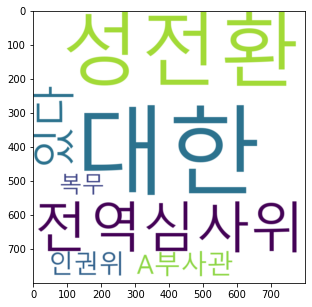

In [166]:
fig = plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

## wordcloud sentence

In [99]:
from krwordrank.sentence import summarize_with_sentences

In [100]:
keywords, sents = summarize_with_sentences(texts, num_keywords=100, num_keysents=10)

In [104]:
penalty = lambda x:0 if (25 <= len(x) <= 80) else 1
stopwords = {'은', '이다', '입니다', '였다', '한다', '했다'}

keywords, sents = summarize_with_sentences(
    texts,
    penalty=penalty,
    stopwords = stopwords,
    diversity=0.5,
    num_keywords=100,
    num_keysents=10,
    verbose=True
)

scan vocabs ... 
num vocabs = 55
done = 10


generator? 왜 쓰는지 잘 모르겠음

In [95]:
def __array__(self):
    return self.to_array()

def to_array(self):
    return np.array(self.to_image())

array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.show()
fig.savefig('wordcloud_without_axisoff.png')